# Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pathlib
import PIL
import scipy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Sequential
import gc
from tensorflow.keras import backend as k
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU
from tensorflow.keras.callbacks import Callback

### Load data and get file path

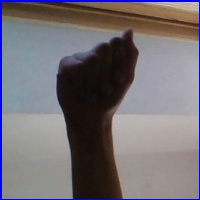

In [12]:
data_path = '../Data/archive/asl_alphabet_train/asl_alphabet_train/'

data_dir = pathlib.Path(data_path)

data_path2 = '../Data/archive/asl_alphabet_test/'

data_dir2 = pathlib.Path(data_path2)

#A = list(data_dir.glob('A/*'))
#image_count = len(A)
#PIL.Image.open(str(A[0]))

A = list(data_dir.glob('A/*'))
image_count = len(A)
PIL.Image.open(str(A[0]))

### Splitting data into train and validation datasets

In [13]:
batch_size = 16
img_height = 200
img_width = 200

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(200, 200),
    batch_size=16,
    subset="training",
    class_mode="categorical",
    shuffle=True,
    color_mode="rgb"
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(200, 200),
    batch_size=16,
    subset="validation",
    class_mode="categorical",
    shuffle=True,
    color_mode="rgb"
)

test_generator = test_datagen.flow_from_directory(
    data_dir2,
    target_size=(200, 200),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
)

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
Found 28 images belonging to 1 classes.


#### Resnet model

In [46]:
#class_names = train_generator.classes
#label_map = (train_generator.class_indices)
#num_classes = len(label_map)
#print(num_classes)
#
#model = tf.keras.applications.resnet50.ResNet50(
#    include_top=True,
#    weights=None,
#    input_tensor=None,
#    input_shape=(200,200,3),
#    pooling=None,
#    classes=num_classes,)
#
#model.compile(optimizer='adam',
#              loss='categorical_crossentropy',
#              metrics=['accuracy'],
#              #run_eagerly=True
#                )
#              
#model.summary()

#### VGG16

In [ ]:
#class_names = train_generator.classes
#label_map = (train_generator.class_indices)
#num_classes = len(label_map)
#print(num_classes)
#
#model = tf.keras.applications.VGG16(
#    include_top=True,
#    weights=None,
#    input_tensor=None,
#    input_shape=(200,200,3),
#    pooling=None,
#    classes=num_classes,)
#
#model.compile(optimizer='sgd',
#              loss='categorical_crossentropy',
#              metrics=['accuracy'],
#              #run_eagerly=True
#                )
#              
#model.summary()

#### Basic model.

In [14]:
#class_names = train_generator.classes
#label_map = (train_generator.class_indices)
#num_classes = len(label_map)
#print(num_classes)
#
#model = Sequential([
#  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#  layers.Conv2D(16, 3, padding='same', activation='relu'),
#  layers.MaxPooling2D(),
#  layers.Conv2D(32, 3, padding='same', activation='relu'),
#  layers.MaxPooling2D(),
#  layers.Conv2D(64, 3, padding='same', activation='relu'),
#  layers.MaxPooling2D(),
#  layers.Flatten(),
#  layers.Dense(128, activation='relu'),
#  layers.Dense(num_classes)
#])
#
#model.compile(optimizer='adam',
#              loss='categorical_crossentropy',
#              metrics=['accuracy'],
#              run_eagerly=True)
#              
#model.summary()

29
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)      

#### Running the model

In [15]:
epochs = 50

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=5
)


C:\Users\cyan1\AppData\Local\Temp\ipykernel_13620\1047679371.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/5
  23/4350 [..............................] - ETA: 18:58 - loss: 8.3688 - accuracy: 0.0408

KeyboardInterrupt: 

#### Checking for accuracy with test.

In [49]:
validation_generator.reset()

score = model.evaluate(validation_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
predict=model.predict(validation_generator)
y_classes = predict.argmax(axis=-1)
pred = np.argmax(y_classes)
print(y_classes)

272/272 [==============================] - 7s 26ms/step - loss: 7.7811 - accuracy: 0.0345 0s - loss: 7.8330 
Test loss: 7.781148433685303
Test accuracy: 0.03448275849223137
[10 10 10 ... 10 10 10]


#### Creating Model history and printing out statistics in form of graphs.

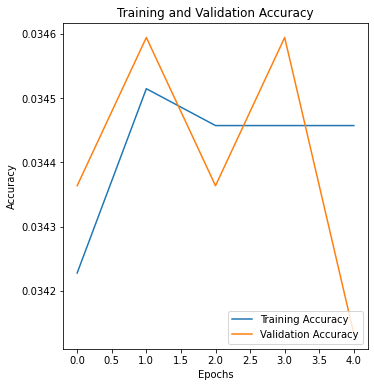

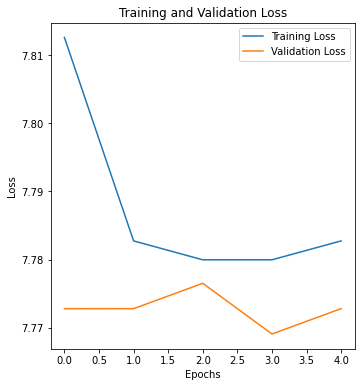

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

